In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, diff, lambdify, solve

%matplotlib inline

In [2]:
xs = -2
xe = 2
ys = -2
ye = 2
xtics = 11
ytics = 11
num_p = 1001
real, imag = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))

In [3]:
x = symbols('x')
fx = x**3 - 0.8
np_fx = lambdify(x, fx)
dfdx = diff(fx, x)
np_dfdx = lambdify(x, dfdx)
sol = solve(fx, x)
np_sol = np.array(lambdify((),sol)())

In [4]:
points = real+imag*1j

In [5]:
def closest(points, sols):
    distances = np.dstack([points for i in sols])
    distances = np.absolute(distances-sols)
    sotred_dist = np.sort(distances, axis=-1)
    collisions = sotred_dist[:,:,1] - sotred_dist[:,:,0]
    collisions = np.where(collisions != 0, 1, 0)
    argmins = np.argmin(distances, axis=2) + 1
    return argmins*collisions

In [6]:
itrs = 100
for i in range(itrs):
    points = points - np_fx(points)/np_dfdx(points)

newton = closest(points, np_sol)

<ipython-input-6-faf780494b9a>:3: RuntimeWarning: divide by zero encountered in true_divide
  points = points - np_fx(points)/np_dfdx(points)
<ipython-input-6-faf780494b9a>:3: RuntimeWarning: invalid value encountered in true_divide
  points = points - np_fx(points)/np_dfdx(points)


[]

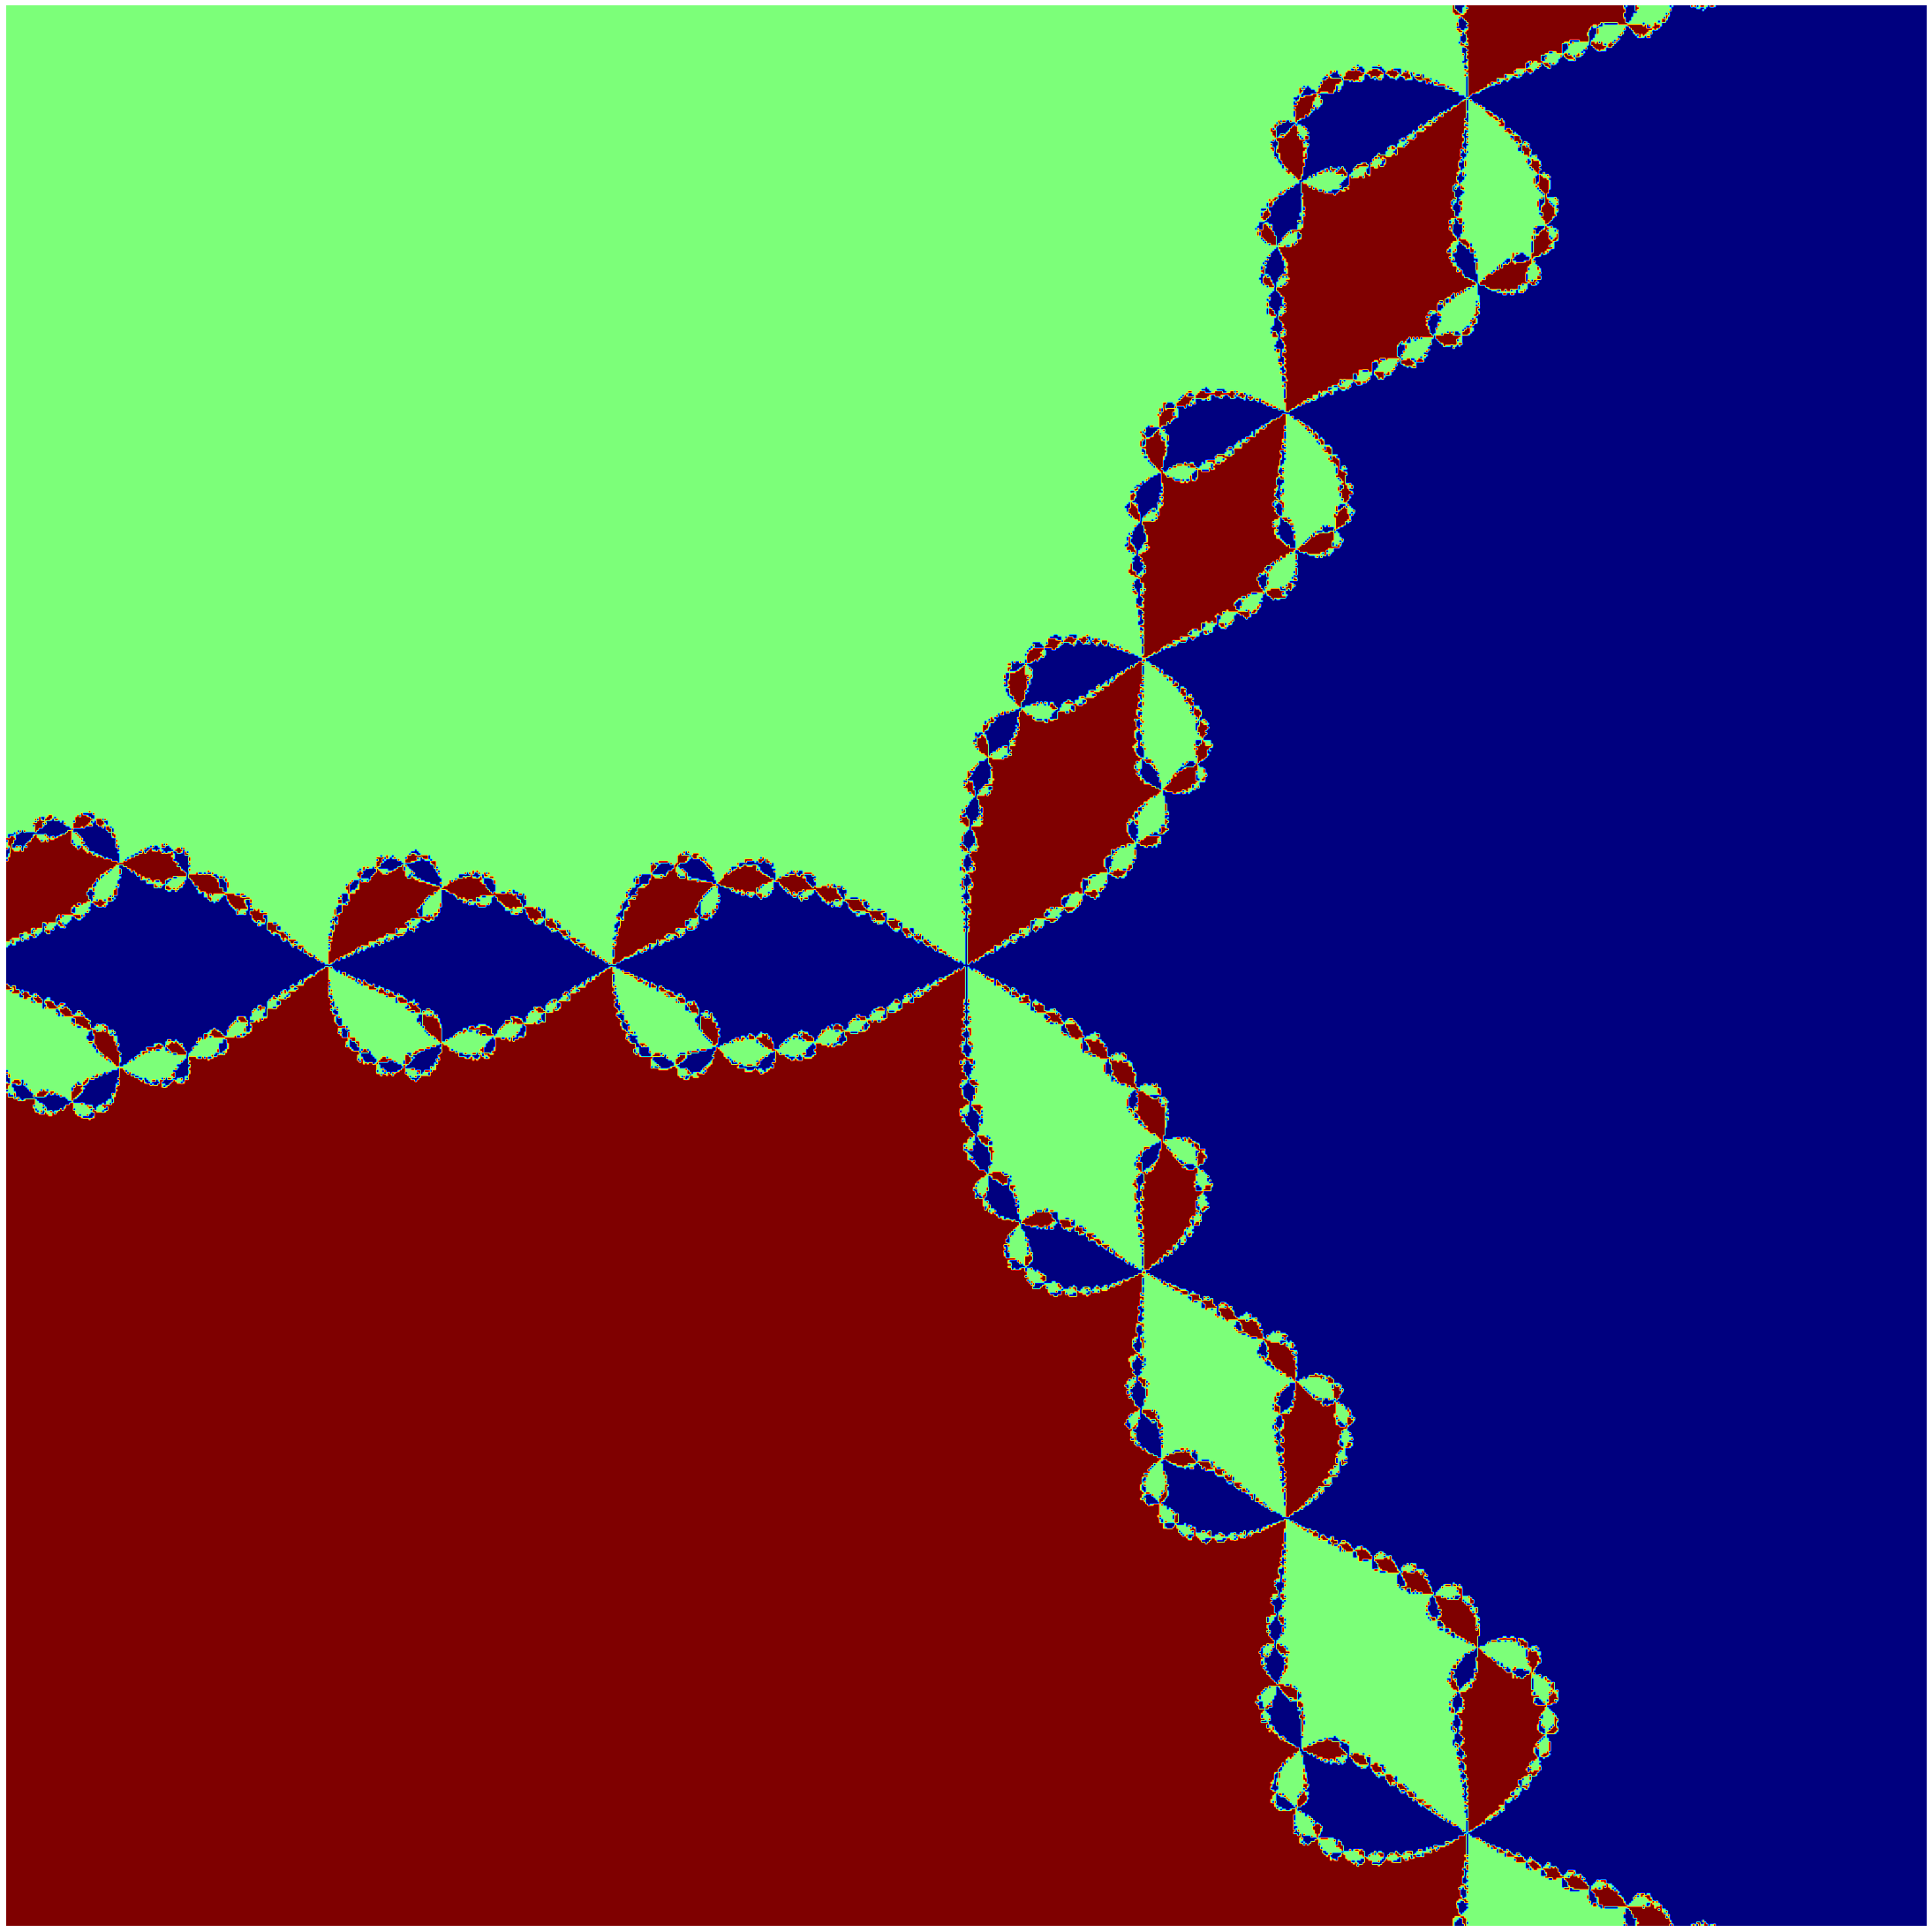

In [14]:
fig, ax = plt.subplots(figsize=(40, 40))
ax.imshow(newton,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()

In [10]:
inf_comp

array(inf+infj)